In [1]:
import torch
import numpy as np
from torch import nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

## Training Models

### Linear Regression

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
# generate data using known parameters, we will try and learn these parameters during training
X = 10*torch.randn(size=(1000,1), device=device)
y =  3*(X**2) - 2*X + 4
noise = 150*torch.randn(size=(1000,1), device=device)
y = y + noise


In [4]:
# create training and testing splits
train_split = int(0.8 * len(X))

X_train = X[:train_split]
y_train = y[:train_split]

X_test = X[train_split:]
y_test = y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test), X_train, torch.min(y_train)

(800,
 800,
 200,
 200,
 tensor([[ 5.9766e-01],
         [-8.6501e+00],
         [-1.0910e+01],
         [ 1.5222e+01],
         [ 3.7073e+00],
         [ 1.0835e+01],
         [ 5.9109e+00],
         [ 9.1000e+00],
         [-6.2708e+00],
         [-4.0049e-02],
         [-1.1246e+01],
         [-2.2692e+00],
         [ 8.7393e-01],
         [ 7.2415e-02],
         [-1.0614e+01],
         [ 1.9038e+01],
         [-1.2137e+01],
         [ 1.9761e+01],
         [ 1.0449e+01],
         [ 1.9884e+00],
         [ 1.6987e+00],
         [ 9.8156e-01],
         [ 6.0276e+00],
         [-1.2683e+01],
         [ 7.1177e+00],
         [-7.2250e+00],
         [-7.9431e+00],
         [-6.6292e+00],
         [ 4.1445e+00],
         [-1.1209e+01],
         [ 4.4753e+00],
         [ 1.9888e+01],
         [-1.1769e+00],
         [-8.9558e+00],
         [-3.2856e+00],
         [ 1.6132e+01],
         [-2.8995e+00],
         [-7.2798e+00],
         [ 1.7011e+01],
         [ 4.2187e+00],
         [ 1.225

In [5]:
def plot_predictions(train_data,
                     train_labels,
                     test_data,
                     test_labels,
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    
    plt.figure(figsize=(10,7))
    
    # plot training data in blue
    plt.scatter(train_data.cpu(), train_labels.cpu(), c="b", s=4, label="Training Data")
    
    # plot test data in red
    plt.scatter(test_data.cpu(), test_labels.cpu(), c="g", s=4, label="Testing Data")
    
    if predictions is not None:
        plt.scatter(test_data.cpu(), predictions.cpu(), c='r', s=4, label="Predictions")
    
    plt.legend(prop={"size": 14})
    
    plt.show()

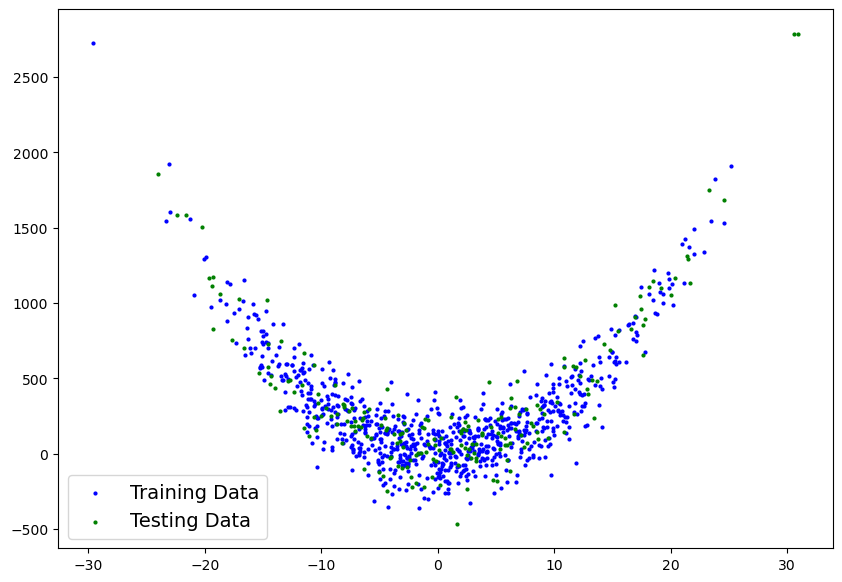

In [6]:
plot_predictions(X_train, y_train, X_test, y_test)

In [7]:
def h_theta(x, params):
    return params[0] + params[1]*x

In [8]:
# cost function = (1/2)* sum(h(x_i)-y_i)^2

def gradient_descent(data, labels, weight, bias, lr, num_batches):
    
    randomidxs = torch.randperm(len(data))
    data = data[randomidxs]
    labels = labels[randomidxs]
    
    batchsize = int(len(data)/num_batches)
    
    for n in range(num_batches):
    
        data_minibatch = data[n*batchsize:(n+1)*batchsize]
        labels_minibatch = labels[n*batchsize:(n+1)*batchsize]
    
        weight_grad = 0
        bias_grad = 0
    
        for x,y in zip(data_minibatch,labels_minibatch):
            pred = h_theta(x.item(),(bias, weight))
            weight_grad += (pred-y.item())*(x.item())
            bias_grad += (pred-y.item())    

        weight = weight - lr*(weight_grad/len(data_minibatch))
        bias = bias - lr*(bias_grad/len(data_minibatch))
        
    return weight, bias

In [9]:
for epoch in range(100):
    weight, bias = gradient_descent(X_train, y_train, 1, 1, 0.01, 8)
    if(epoch % 20 == 0):
        print(f"epoch {epoch}: weight = {weight}, bias = {bias}")

epoch 0: weight = -5.010124718791772, bias = 21.34828555873759
epoch 20: weight = 5.277814105373736, bias = 21.428115091280933
epoch 40: weight = 7.873294236089384, bias = 20.66188885808555
epoch 60: weight = 0.18235395189621983, bias = 21.363264729370936
epoch 80: weight = 1.5140863837865428, bias = 21.307509774537042


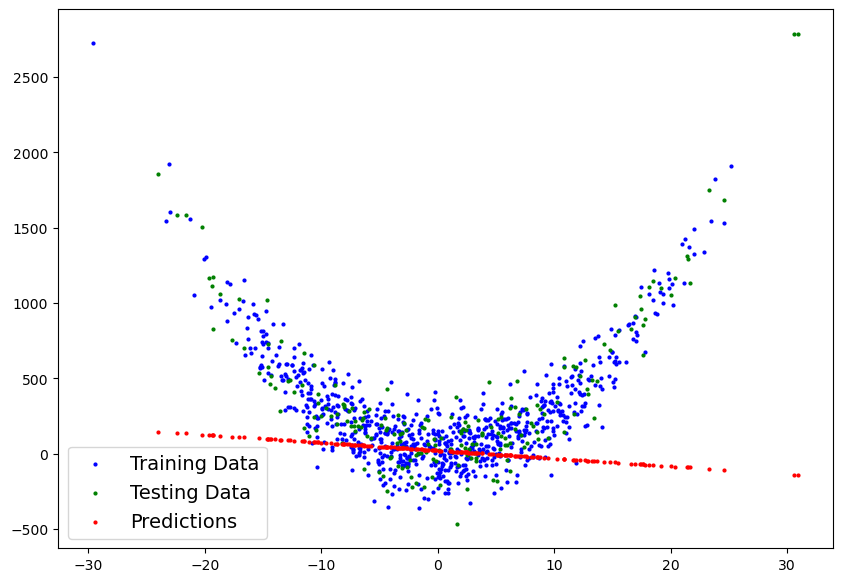

In [10]:
plot_predictions(X_train, y_train, X_test, y_test, h_theta(X_test, [bias, weight]))

### Polynomial Regression

epoch 0: theta1 = 3.3006408336547937, theta2 = 0.9934849223994151, theta3 = 1.0105600959726333
epoch 200: theta1 = 2.98266849283697, theta2 = -1.1427547448601059, theta3 = 1.0937925127228036
epoch 400: theta1 = 2.9858469273828514, theta2 = -1.9102033113812587, theta3 = 1.1733441203225337
epoch 600: theta1 = 2.986774821738493, theta2 = -2.186002583242597, theta3 = 1.2506885398817438
epoch 800: theta1 = 2.986895066615746, theta2 = -2.2850151386920987, theta3 = 1.3268759712764033
epoch 1000: theta1 = 2.986726486653366, theta2 = -2.3204596790147987, theta3 = 1.4022867551850955
epoch 1200: theta1 = 2.986455629655246, theta2 = -2.3330475285283363, theta3 = 1.4770603432238114
epoch 1400: theta1 = 2.986149562961592, theta2 = -2.3374177112882952, theta3 = 1.5512495477556418
epoch 1600: theta1 = 2.985832391054195, theta2 = -2.3388341385500366, theta3 = 1.624876007394618
epoch 1800: theta1 = 2.9855127698594064, theta2 = -2.339189605938533, theta3 = 1.69795013151459
epoch 2000: theta1 = 2.98519380

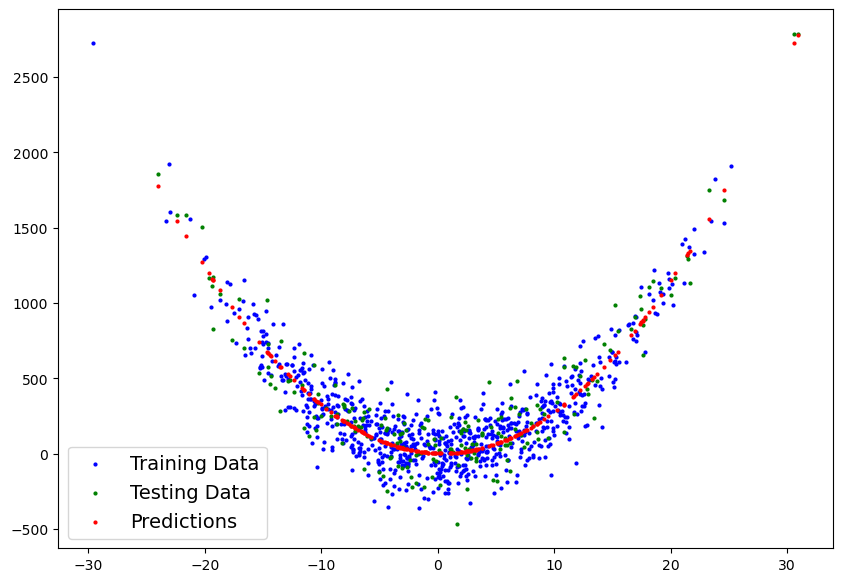

In [11]:
def h_theta_poly(x, params):
    return params[0]*(x**2) + params[1]*x + params[2]

def gradient_descent(data, labels, params, lr, num_batches):

    randomidxs = torch.randperm(len(data))
    data = data[randomidxs]
    labels = labels[randomidxs]

    batchsize = int(len(data)/num_batches)
    
    for n in range(num_batches):
    
        data_minibatch = data[n*batchsize:(n+1)*batchsize]
        labels_minibatch = labels[n*batchsize:(n+1)*batchsize]
    
        theta1_grad = 0
        theta2_grad = 0
        theta3_grad = 0
    
        for x,y in zip(data_minibatch,labels_minibatch):
            pred = h_theta_poly(x.item(),params)
            theta1_grad += (pred-y.item())*(x.item()**2)
            theta2_grad += (pred-y.item())*(x.item())
            theta3_grad += (pred-y.item())

        params[0] = params[0] - lr*(theta1_grad/len(data_minibatch))
        params[1] = params[1] - lr*(theta2_grad/len(data_minibatch))
        params[2] = params[2] - lr*(theta3_grad/len(data_minibatch))

    return params

params = [1,1,1]
for epoch in range(5000):
    params = gradient_descent(X_train, y_train, params, 0.00006, 1)
    if(epoch % 200 == 0):
        print(f"epoch {epoch}: theta1 = {params[0]}, theta2 = {params[1]}, theta3 = {params[2]}")

plot_predictions(X_train, y_train, X_test, y_test, h_theta_poly(X_test, params))

In [35]:
torch.randn(1,dtype=torch.float, requires_grad=True).item()

0.18925915658473969

In [ ]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [37]:
0.7*3 + 0.3*7

4.199999999999999